# Import package

In [1]:
from dc2 import DC2
import torch
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
torch.cuda.set_device(0)

[2024-08-19 13:32:49,513] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


# Initialize model

In [2]:
llava_v15_7b_model_path = r'YOUR_LLAVA_7B_MODEL_PATH'
retrieval_path = r'YOUR RETRIEVAL PATH' # contriever_msmacro
llm_path = r'LLM PATH' # use to extract objects. NOTE: If MLLM can accurately extract objects, there will be no need for an additional LLM.

model = DC2(llava_v15_7b_model_path,retrieval_path,llm_path)
llava_model = model.mllm

You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

# Input

In [3]:
image_file = r'./demo.jpg'
question = "What's the color of the umbrella?"
image = Image.open(image_file)
display(image)

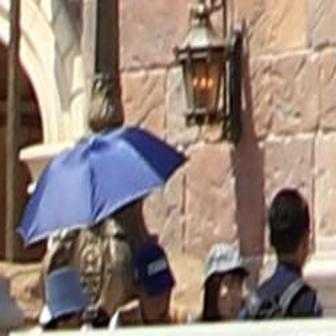

In [4]:
ground_truth = r"./ground_truth.jpg"
image = Image.open(ground_truth)
display(image)

# Output

- LLaVA v1.5 7B

In [5]:
original_response = llava_model.generate(image_file,question)
print("LLaVA-v1.5 7B: {}".format(original_response))

LLaVA-v1.5 7B: The color of the umbrella is red.


- LLaVA v1.5 7B w/ DC$^2$

In [6]:
response, visual_memory = model.run_main(image_file,question,5,0.3,0.1,None)
print("LLaVA-v1.5 7B w/ DC^2: {}".format(response))

Choosen objects list: ['umbrella', 'white balcony']
LLaVA-v1.5 7B w/ DC^2: Blue
